**Importing the necessary libraries**

In [ ]:
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
import tensorflow.keras.applications as app
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline
warnings.filterwarnings('ignore')

Loading the train, test and validation data

In [ ]:
train = glob.glob('../input/100-bird-species/train/*')
test = glob.glob('../input/100-bird-species/test/*')
valid = glob.glob('../input/100-bird-species/valid/*')

Check the distribution of data

In [ ]:
tr_total = ts_total = vl_total = 0
for tr, ts, vl in zip(train, test, valid):
    tr_total += len(glob.glob(tr + '/*'))
    ts_total += len(glob.glob(ts + '/*'))
    vl_total += len(glob.glob(vl + '/*'))

print("Train Total = %d\nTest total = %d\nValid Total = %d" %(tr_total, ts_total, vl_total))

Train Total = 31316
Test total = 1125
Valid Total = 1125


Getting the list of all 225 birds

In [ ]:
birds_list = sorted([re.findall('/train/(.+)', train[i])[0] for i in range(len(train))])

In [ ]:
n_classes = len(train)
batch_size = 64
input_shape = (224, 224, 3)

Make the data ready for the model

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = datagen.flow_from_directory('../input/100-bird-species/train/', target_size=input_shape[0:2], class_mode='categorical', batch_size=batch_size, shuffle=True)
val_data = datagen.flow_from_directory('../input/100-bird-species/valid/', target_size=input_shape[0:2], class_mode='categorical', batch_size=batch_size, shuffle=True)
test_data = datagen.flow_from_directory('../input/100-bird-species/test/', target_size=input_shape[0:2], class_mode='categorical', batch_size=batch_size, shuffle=True)

Found 31316 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.


Try to change the index from 0 to 63 to get an image of different birds

y =  NORTHERN GANNET


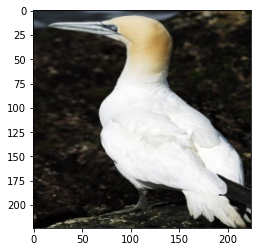

In [ ]:
index = 16
print('y = ', birds_list[np.argmax(val_data[0][1][index])])
plt.imshow(val_data[0][0][index])

Load the pretrained Xception model

In [ ]:
xp = app.xception.Xception(include_top=False, weights='imagenet', input_shape=input_shape)
xp.trainable = False

83689472/83683744 [==============================] - 1s 0us/step


Create the full model

In [ ]:
model = Sequential()

model.add(xp)

model.add(Flatten())

model.add(Dense(units=1098, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=len(train), activation='softmax'))

Compile the model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.000005), loss=CategoricalCrossentropy(), metrics=['accuracy'])

Train the model

In [ ]:
history = model.fit(train_data, epochs=30, steps_per_epoch=len(train_data), verbose=1, validation_data=val_data, validation_steps=len(val_data), use_multiprocessing=True, workers=10)

Epoch 1/30
490/490 [==============================] - 144s 294ms/step - loss: 3.0620 - accuracy: 0.3753 - val_loss: 1.1059 - val_accuracy: 0.8133
Epoch 2/30
490/490 [==============================] - 146s 299ms/step - loss: 1.3002 - accuracy: 0.6894 - val_loss: 0.5988 - val_accuracy: 0.8809
Epoch 3/30
490/490 [==============================] - 143s 293ms/step - loss: 0.8918 - accuracy: 0.7797 - val_loss: 0.4373 - val_accuracy: 0.9067
Epoch 4/30
490/490 [==============================] - 147s 301ms/step - loss: 0.6839 - accuracy: 0.8287 - val_loss: 0.3539 - val_accuracy: 0.9156
Epoch 5/30
490/490 [==============================] - 144s 294ms/step - loss: 0.5603 - accuracy: 0.8566 - val_loss: 0.3087 - val_accuracy: 0.9271
Epoch 6/30
490/490 [==============================] - 144s 293ms/step - loss: 0.4634 - accuracy: 0.8830 - val_loss: 0.2832 - val_accuracy: 0.9298
Epoch 7/30
490/490 [==============================] - 144s 294ms/step - loss: 0.3889 - accuracy: 0.9004 - val_loss: 0.2517 -

Check the training and validation accuracy

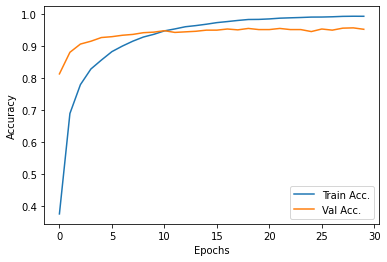

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot([i for i in range(len(history.history['accuracy']))], history.history['accuracy'], label='Train Acc.')
plt.plot([i for i in range(len(history.history['val_accuracy']))], history.history['val_accuracy'], label='Val Acc.')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Check the training and validation loss

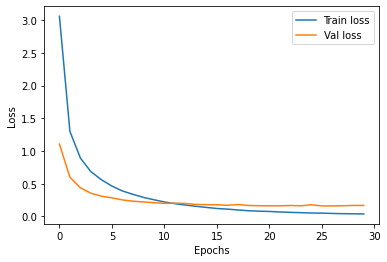

In [ ]:
plt.figure(figsize=(6, 4))
sns.lineplot([i for i in range(len(history.history['loss']))], history.history['loss'], label='Train loss')
sns.lineplot([i for i in range(len(history.history['val_loss']))], history.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Evaluate on the test data

In [ ]:
model.evaluate(test_data)

18/18 [==============================] - 6s 344ms/step - loss: 0.0780 - accuracy: 0.9769


[0.07798460125923157, 0.97688889503479]

**Accuracy on :**

* **Train data  :   99.36%**
* **Val   data  :   95.29%**
* **Test  data  :   97.68%**